### Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Read in the data, set the index to be the state, and fill in the only NaN value under the Recreational? column
crime = pd.read_excel("crime_data_2020.xlsx",skiprows = 1)
crime = crime.set_index("State")
crime = crime.fillna('Yes')
crime

,Recreational?,Population,Density (/mi²),Real GDP,Median Household Income ($),2020 Political View,Prisoners,Incarceration Percentage,Driving Under the Influence,Drug Abuse Violations - Grand Total,Simple Assault,Law Enforcement Agencies Submitted,Law Enforcement Agencies,Percent Enforcement Reported
State,,,,,,,,,,,,,,
Alabama,No,5048733,100,209979.3,56929,Republican,25328,0.5017,210,358,384,13,432,3.01
Alaska,Yes,735707,1,50869.4,81133,Republican,4578,0.6223,3008,808,4591,31,39,79.49
Arizona,Yes,7227450,64,347656.0,70821,Democrat,37731,0.5221,14955,22194,23156,88,125,70.40
Arkansas,No,3021085,58,123347.3,50784,Republican,16094,0.5327,4938,15294,10858,249,305,81.64
California,Yes,39766650,257,2874730.8,81575,Democrat,97328,0.2447,95778,185985,68962,630,740,85.14
Colorado,Yes,5848166,57,373763.3,84954,Democrat,16168,0.2765,15490,10070,16237,204,246,82.93
Connecticut,No,3609129,746,246555.9,80958,Democrat,9559,0.2649,5151,4422,14921,107,107,100.00
Delaware,No,999149,517,64404.7,68687,Democrat,4710,0.4714,294,3308,5392,54,62,87.10
Florida,No,21811875,412,1029575.6,59734,Republican,81027,0.3715,29126,68614,75537,574,687,83.55


In [3]:
#Getting the OLS regression results for the dep. variables
ols_crime = crime.drop(columns=['Recreational?', 'Population', 'Density (/mi²)', 'Real GDP', 'Median Household Income ($)', '2020 Political View', 'Prisoners', 'Incarceration Percentage', 'Law Enforcement Agencies Submitted', 'Law Enforcement Agencies', 'Percent Enforcement Reported' ])
"""Thrse are the dependant variables we are dropping from the main dataset"""

crime_population = crime['Population']
crime_model = sm.OLS(crime_population, ols_crime)
"""Getting the OLS model with population as the dependant variable"""
result = crime_model.fit()

In [4]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             Population   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              110.2
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                    2.84e-21
Time:                        18:25:09   Log-Likelihood:                         -824.62
No. Observations:                  50   AIC:                                      1655.
Df Residuals:                      47   BIC:                                      1661.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

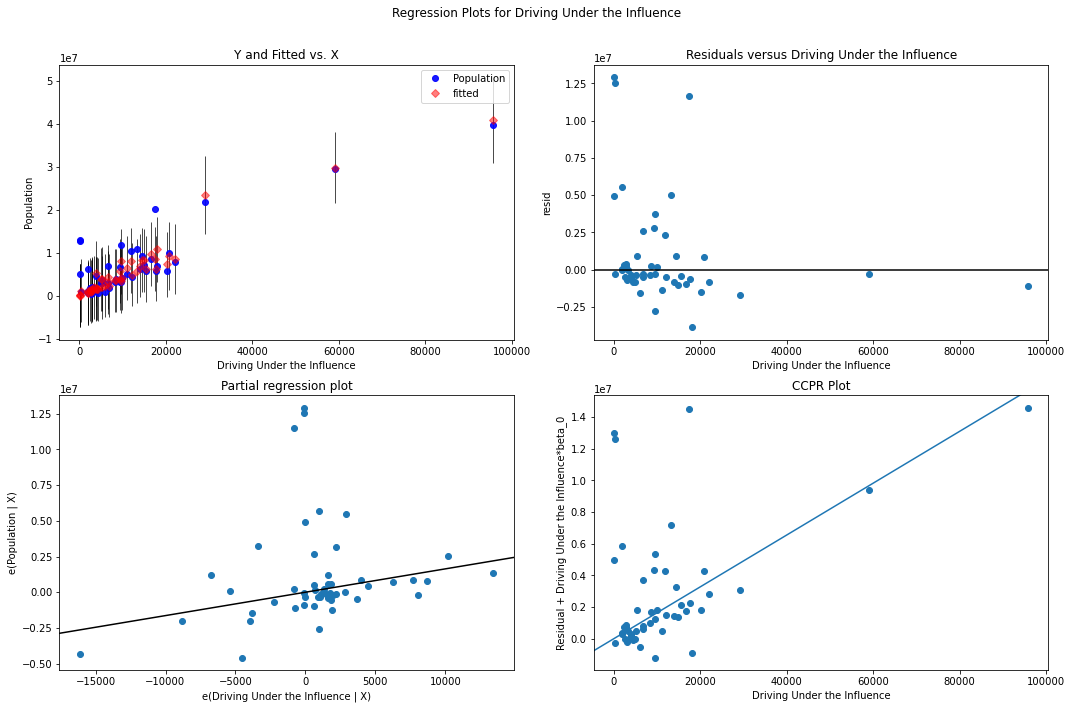

In [5]:
#Plotting the Driving Under the Influence x Population
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result, 'Driving Under the Influence', fig=fig)
plt.show()

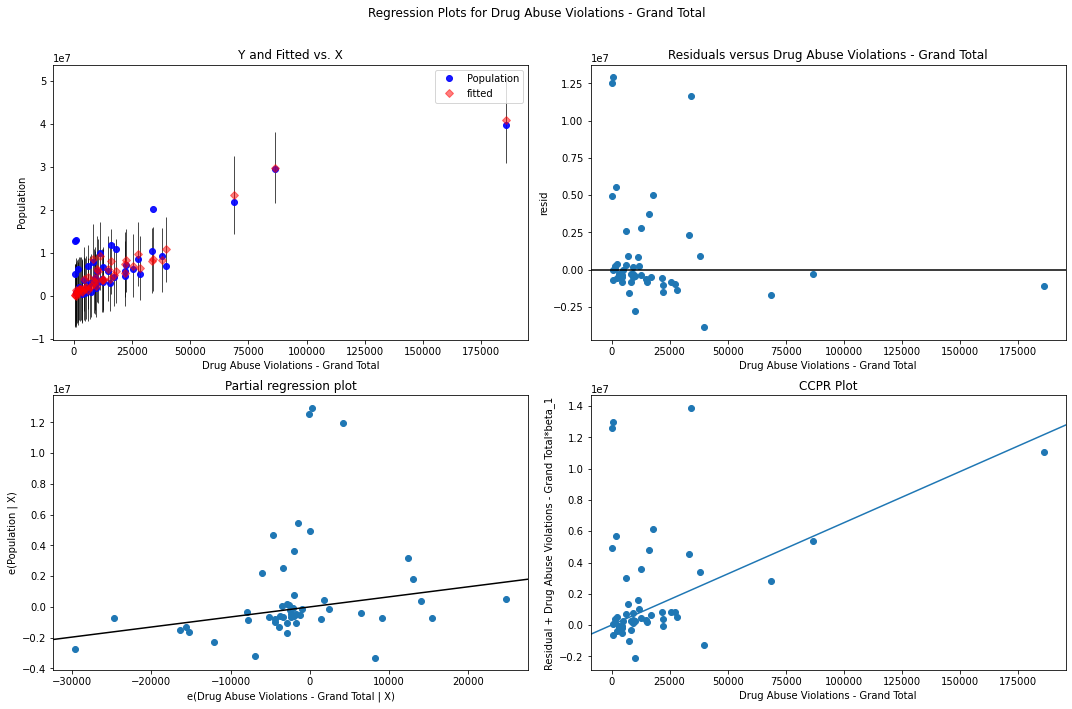

In [6]:
#Plotting the Drug Abuse Violations - Grand Total x Population
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result, 'Drug Abuse Violations - Grand Total', fig=fig)
plt.show()

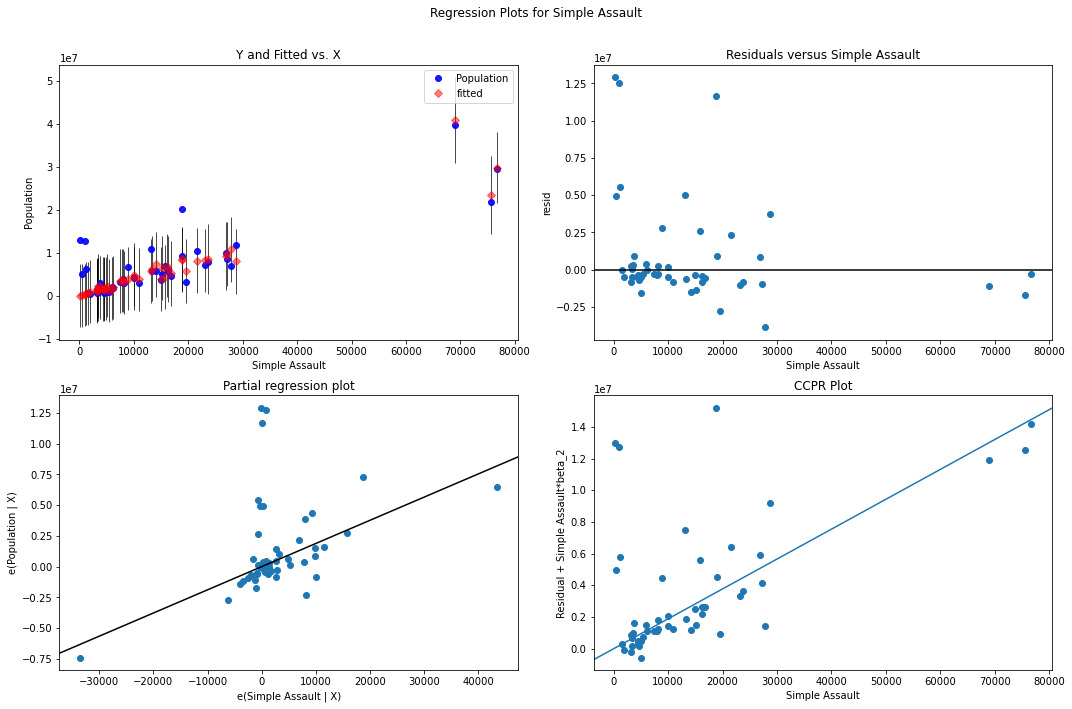

In [7]:
#Plotting the Simple Assault x Population
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result, 'Simple Assault', fig=fig)
plt.show()

In [8]:
crime_gdp = crime['Real GDP']
crime_model1 = sm.OLS(crime_gdp, ols_crime)
"""Getting the OLS model with real gdp as the dependant variable"""

result1 = crime_model1.fit()

In [9]:
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:               Real GDP   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              99.82
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                    2.12e-20
Time:                        18:25:10   Log-Likelihood:                         -688.83
No. Observations:                  50   AIC:                                      1384.
Df Residuals:                      47   BIC:                                      1389.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

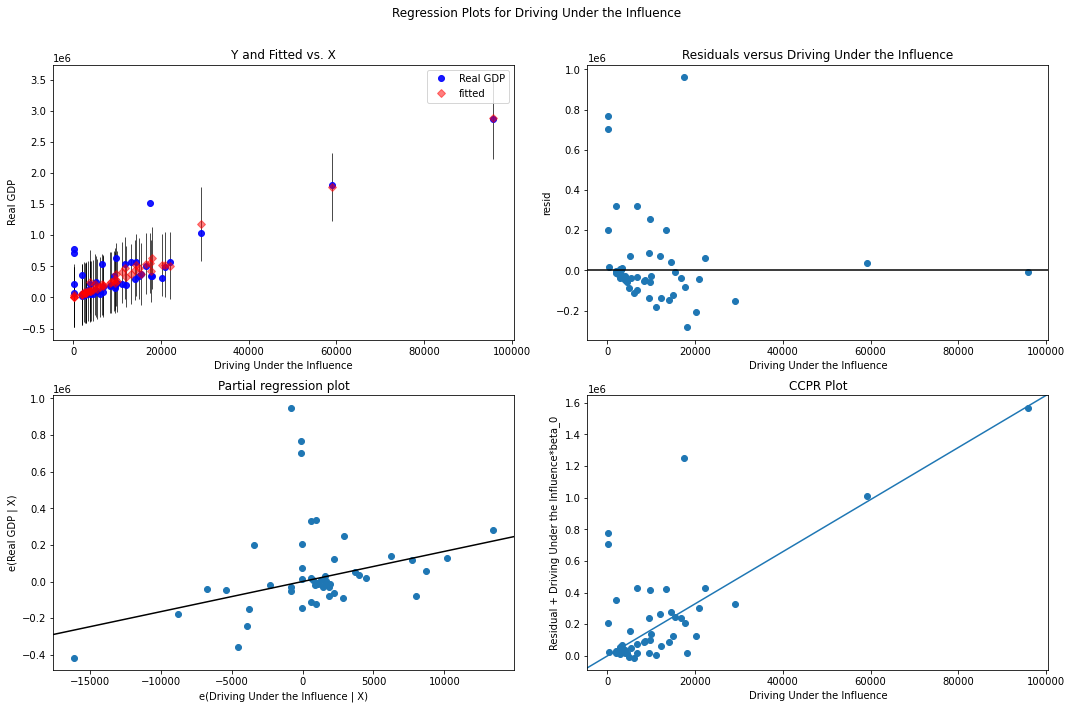

In [10]:
#Plotting the Driving Under the Influence x GDP
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result1, 'Driving Under the Influence', fig=fig)
plt.show()

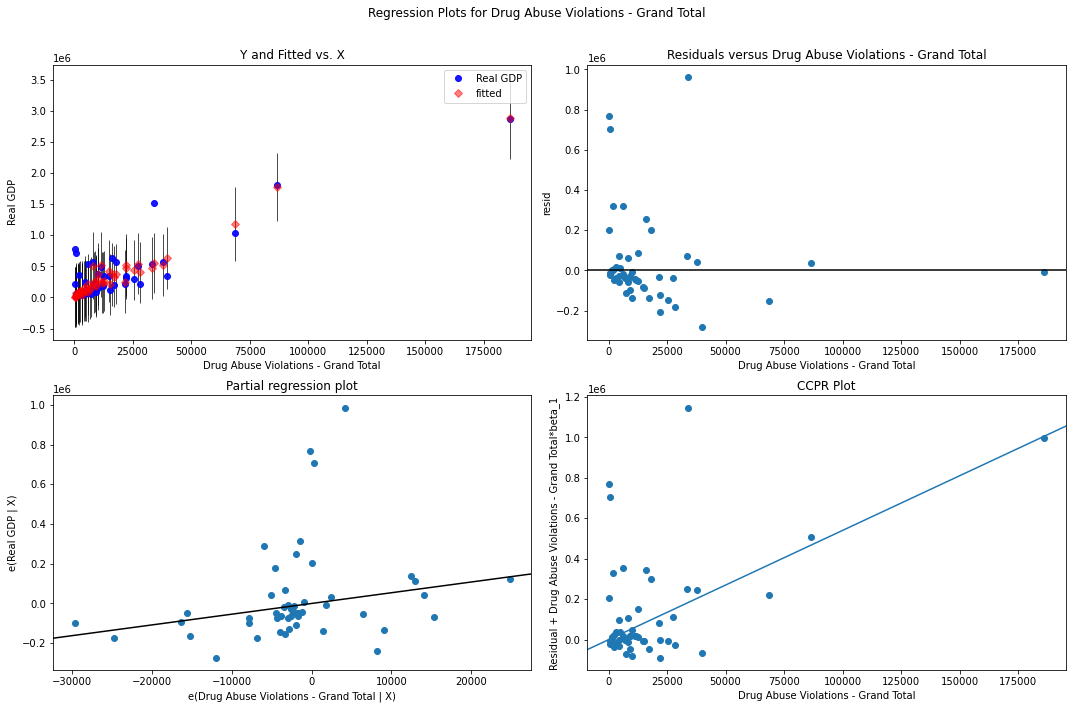

In [11]:
#Plotting the Drug Abuse Violatons - Grand Total x GDP
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result1, 'Drug Abuse Violations - Grand Total', fig=fig)
plt.show()

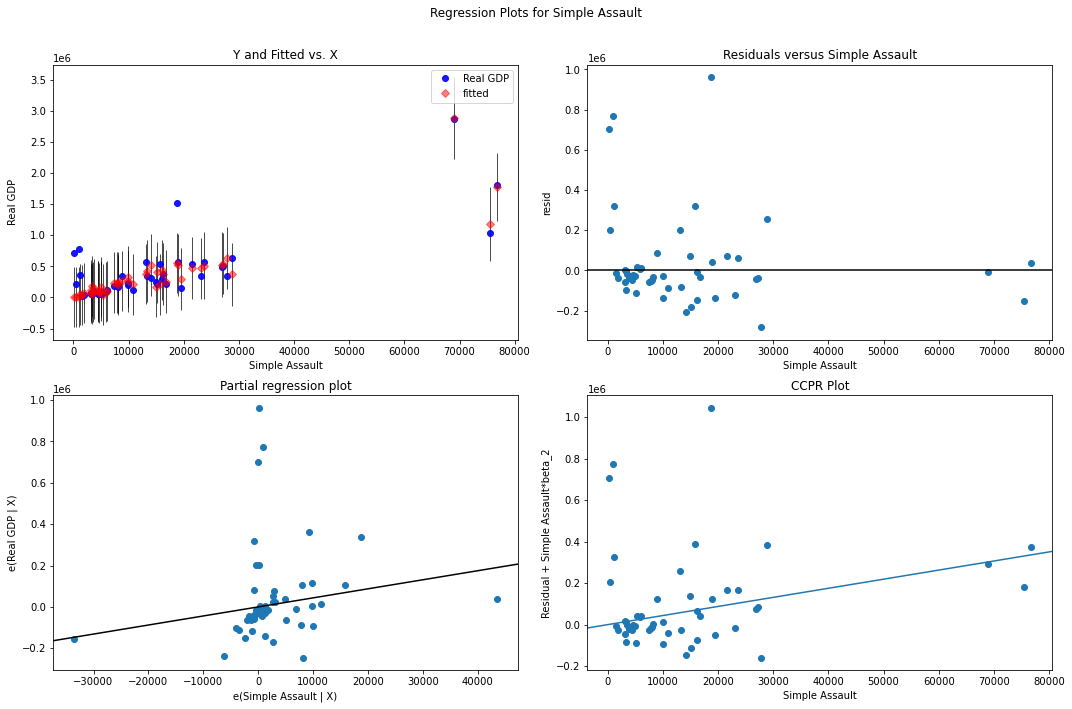

In [12]:
#Plotting the Simple Assault x GDP
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result1, 'Simple Assault', fig=fig)
plt.show()

In [13]:
crime_income = crime['Median Household Income ($)']
crime_model2 = sm.OLS(crime_income, ols_crime)
"""Getting the OLS model with median household income as the dependant variable"""

result2 = crime_model2.fit()

In [14]:
print(result2.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Median Household Income ($)   R-squared (uncentered):                   0.469
Model:                                     OLS   Adj. R-squared (uncentered):              0.435
Method:                          Least Squares   F-statistic:                              13.85
Date:                         Mon, 05 Dec 2022   Prob (F-statistic):                    1.33e-06
Time:                                 18:25:12   Log-Likelihood:                         -614.39
No. Observations:                           50   AIC:                                      1235.
Df Residuals:                               47   BIC:                                      1241.
Df Model:                                    3                                                  
Covariance Type:                     nonrobust                                                  
                              

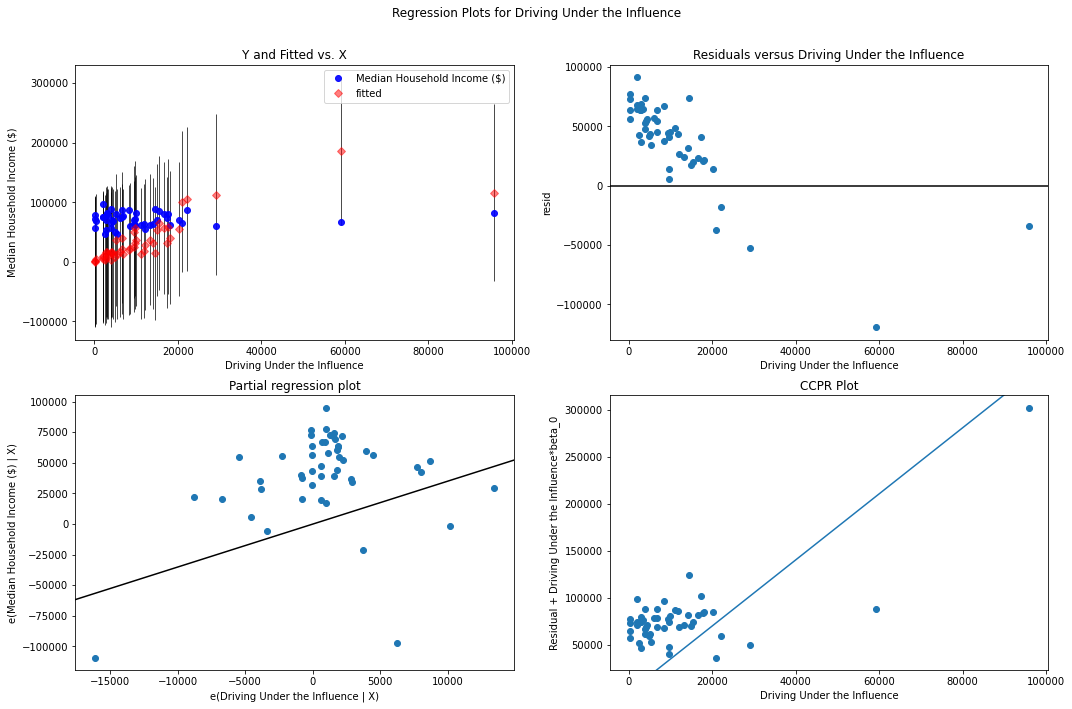

In [15]:
#Plotting the Driving Under the Influence x Income
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result2, 'Driving Under the Influence', fig=fig)
plt.show()

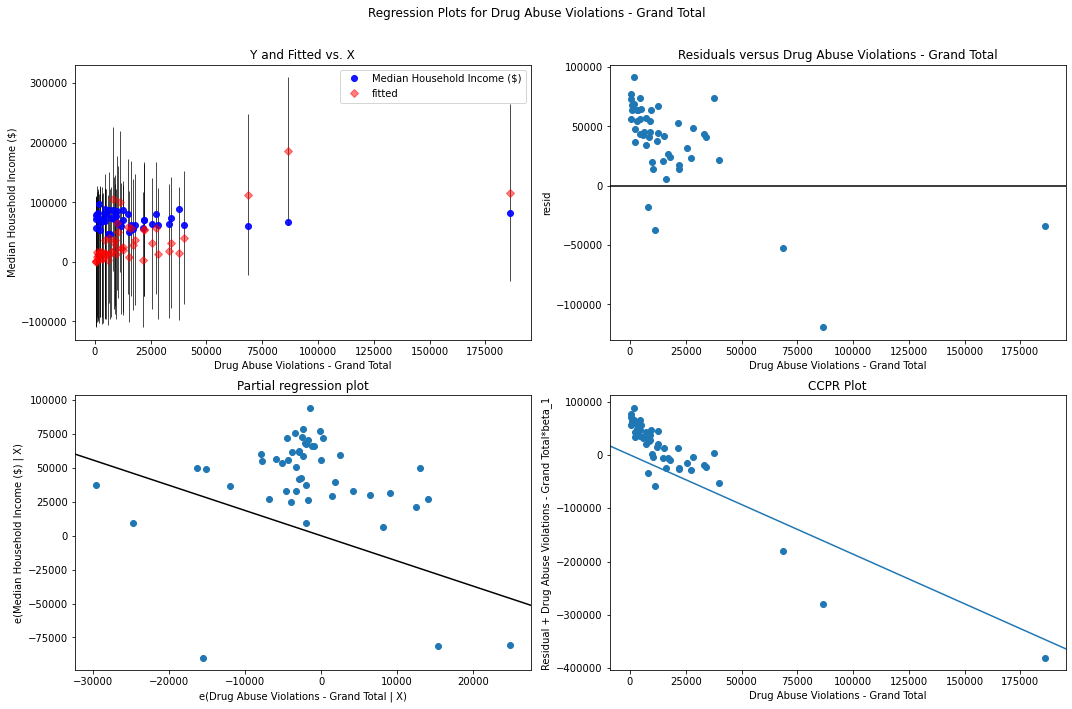

In [16]:
#Plotting the Drug Abuse Violatons - Grand Total x Income
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result2, 'Drug Abuse Violations - Grand Total', fig=fig)
plt.show()

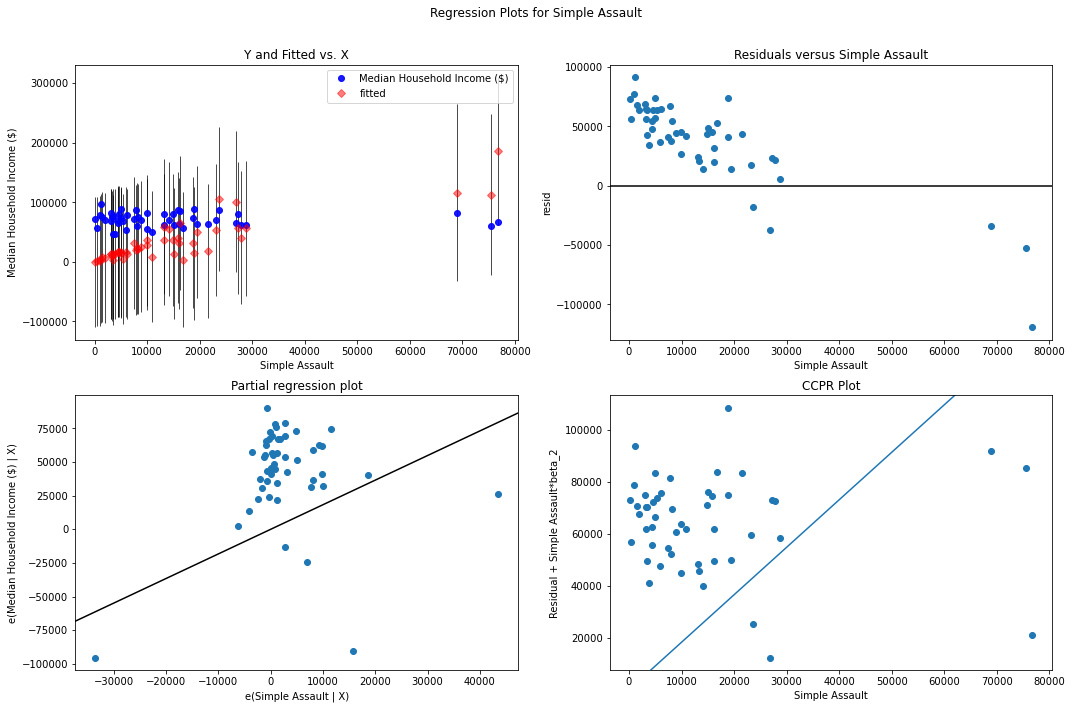

In [17]:
#Plotting the Simple Assault x Income
fig = plt.figure(figsize=(15,10))

sm.graphics.plot_regress_exog(result2, 'Simple Assault', fig=fig)
plt.show()

In [18]:
#Making the logit regression with political view
crime_regression = ols_crime
crime_politics = crime['2020 Political View'].replace({'Republican':0.0, 'Democrat':1.0})

In [19]:
train_vector, test_vector, train_label, test_label = train_test_split(crime_regression,crime_politics,test_size=0.25,train_size=0.75)

"""Setting test and train vectors"""

'Setting test and train vectors'

In [20]:
#Making the model
logit_model1 = sm.Logit(train_label, sm.add_constant(train_vector))
result3 = logit_model1.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.570104
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     2020 Political View   No. Observations:                   37
Model:                           Logit   Df Residuals:                       33
Method:                            MLE   Df Model:                            3
Date:                 Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1736
Time:                         18:25:13   Log-Likelihood:                -21.094
converged:                        True   LL-Null:                       -25.525
Covariance Type:             nonrobust   LLR p-value:                   0.03119
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.1388    

In [21]:
#Masking the values to create and accuracy score and then creating said accuracy score
preds = result3.predict(sm.add_constant(test_vector))
mask = preds <= 0.5
preds.loc[mask] = 0
mask1 = preds > 0.5
preds.loc[mask1] = 1

print(accuracy_score(test_label, preds))

0.5384615384615384


In [22]:
#Making the logit regression with states who legalized marijuana and states who havent
crime_legalize = crime['Recreational?'].replace({'Yes':0.0, 'No':1.0})
train_vector, test_vector, train_label, test_label = train_test_split(crime_regression,crime_legalize,test_size=0.25,train_size=0.75)

"""Setting more test and train vectors!!! :)"""

'Setting more test and train vectors!!! :)'

In [23]:
#Creating the model
logit_model2 = sm.Logit(train_label, sm.add_constant(train_vector))
result4 = logit_model2.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.527727
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Recreational?   No. Observations:                   37
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                 0.04878
Time:                        18:25:13   Log-Likelihood:                -19.526
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                    0.5719
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.4728      0.550 

In [24]:
#Masking the values to create and accuracy score and then creating said accuracy score...again
preds = result4.predict(sm.add_constant(test_vector))
mask = preds <= 0.5
preds.loc[mask] = 0
mask1 = preds > 0.5
preds.loc[mask1] = 1

print(accuracy_score(test_label, preds))

0.6153846153846154


In [25]:
crime_corr = crime.corr()
"""Setting the crime dataset to get the correaltion values"""

'Setting the crime dataset to get the correaltion values'

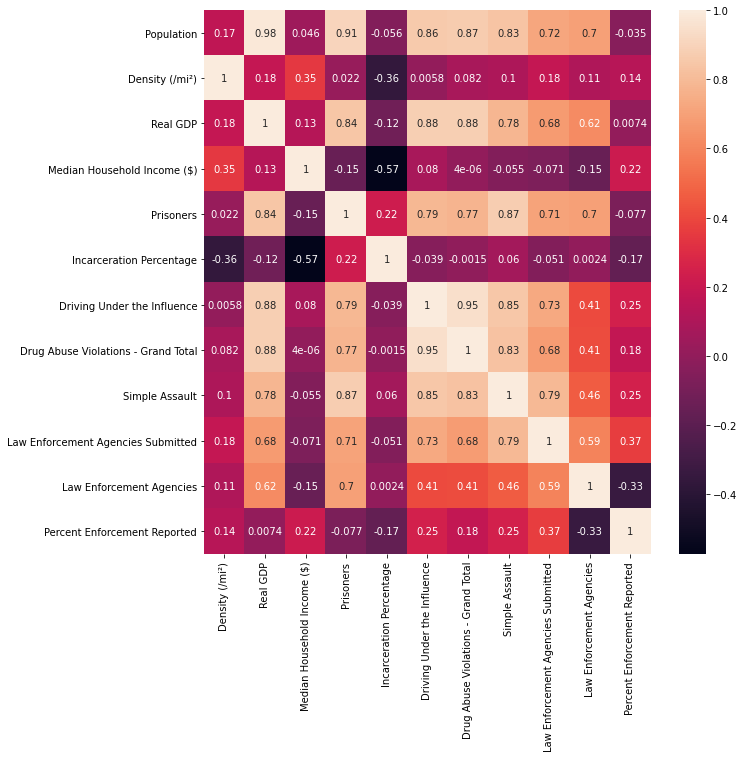

In [26]:
#Plotting the correlation heatmap
fig, ax = plt.subplots(1,1, figsize = (10,10) )

sns.heatmap(crime_corr.iloc[:,1:], annot = True);